In [12]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'label'


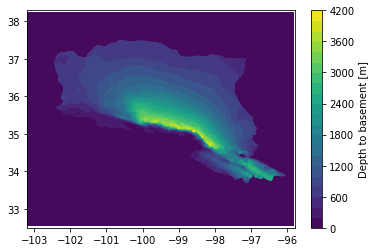

In [13]:
import xarray as xr
from scipy import interpolate
from netCDF4 import Dataset as netcdf_dataset
import matplotlib.pyplot as plt

fn = "datasets/GeologicalData/Basement_depth/DepthtoBasement_Anadarko_0.01deg.grd"
nc = xr.open_dataset(fn)
nc.z.to_dataframe().to_csv('tmp.csv')

df = pd.read_csv("tmp.csv")
df.rename(columns={"x": "lon", "y": "lat"}, inplace=True)
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = df.drop(['lat', 'lon'], axis=1)
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
gdf['x_m'], gdf['y_m'] = gdf.geometry.x, gdf.geometry.y

# Interpolate onto discrete grid (for plotting smooth contours)
x_all = np.arange(-103.2, -95.8, 0.01)
y_all = np.arange(32.5, 38.3, 0.01)


xx, yy = np.meshgrid(x_all, y_all)
z_interp = interpolate.griddata((gdf['x_m'].values, gdf['y_m'].values), gdf['z'].values, (xx, yy),
                                method='linear')

ax = plt.subplot()
c = ax.contourf(xx, yy, z_interp, label="Smoothed depth to basement", levels=20)
cbar = plt.colorbar(c)
cbar.set_label("Depth to basement [m]")